In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("Data_Analyst.csv", sep=";", encoding="windows-1251")

In [65]:
df.head

<bound method NDFrame.head of                                                  Title     Type of media  \
0    Нова реальність, нові подарунки нашим захисник...  Соціальні мережі   
1    Український зооринок: від стихійної торгівлі в...          Інтернет   
2    Распознано автоматически: Исландия ТВ 2024-07-...                ТБ   
3    Распознано автоматически: Исландия ТВ 2024-07-...                ТБ   
4    Самое сочное мороженое: топ-10 брендов фруктов...          Інтернет   
..                                                 ...               ...   
241  ФЕЙК: Nestle відправить в Україну забруднену в...          Інтернет   
242  Виробник "Мілки" й "Орео" приховав прибутки в ...          Інтернет   
243  30 людей поділилися в мережі жахливими продукт...          Інтернет   
244  35 відомих страв і напоїв, які були винайдені ...          Інтернет   
245  У Метінвесті робота з ветеранами  це відповіда...          Інтернет   

              Source                    Region  \
0      

In [66]:
# Искомое слово
word_part = "Nestl"

# Проверяем, есть ли слово в первом столбце
filtered_df = df[df.iloc[:, 0].str.contains(f"{word_part}.*", case=False, na=False)]  # case=False игнорирует регистр

Сума медіа єфективності

In [68]:
df['Media efficiency'] = df['Media efficiency'].str.replace(',', '.').astype(float)
column_sum = df["Media efficiency"].sum()
print(column_sum)

-72.57000000000001


In [69]:
percentage = df['Tonality'].value_counts(normalize=True) * 100

print(percentage)

Tonality
Позитив    37.398374
Нейтрал    31.300813
Негатив    31.300813
Name: proportion, dtype: float64


In [70]:
print(df["Media efficiency"].head(200))

0      3.00
1      0.75
2      4.00
3      4.00
4      0.50
       ... 
195    1.25
196    1.25
197    7.50
198    0.50
199    0.13
Name: Media efficiency, Length: 200, dtype: float64


In [93]:
df['Release date'] = pd.to_datetime(df['Release date'], format = '%d.%m.%Y')


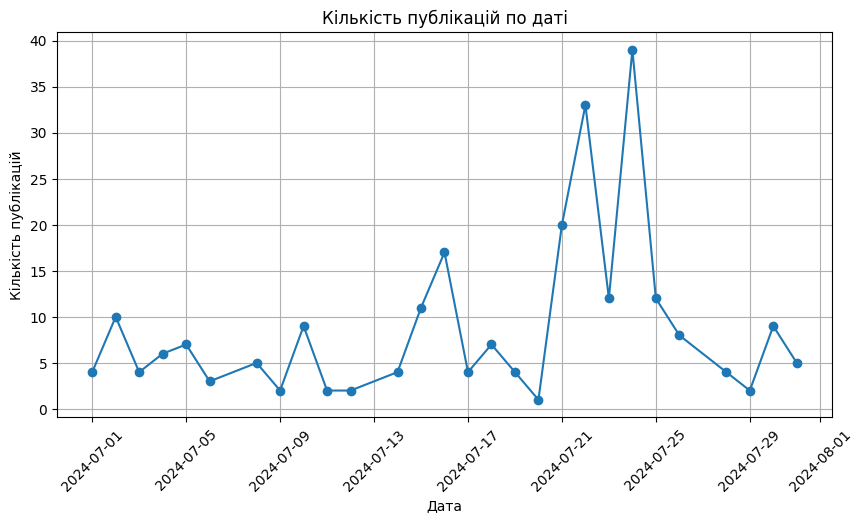

In [106]:
df_counts = df.groupby('Release date').size()

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(df_counts.index, df_counts.values, marker='o', linestyle='-')

# Настройки графика
plt.xlabel('Дата')
plt.ylabel('Кількість публікацій')
plt.title('Кількість публікацій по даті')
plt.xticks(rotation=45)
plt.grid()

plt.savefig('Кількість публікацій по даті.png', dpi=300, bbox_inches='tight')
# Показать график
plt.show()


In [74]:
df_positive = df[df['Tonality'] == 'Позитив']
df_negative = df[df['Tonality'] == 'Негатив']
df_neutral = df[df['Tonality'] == 'Нейтрал']

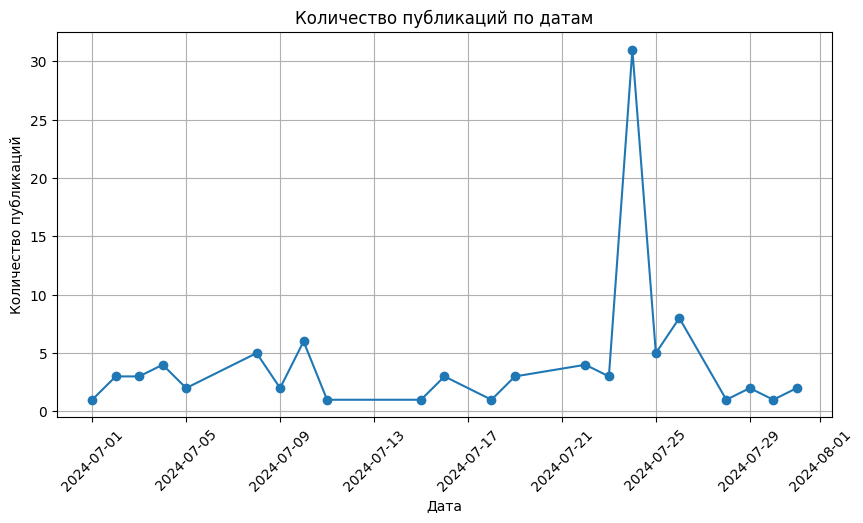

In [75]:
df_counts = df_positive.groupby('Release date').size()

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(df_counts.index, df_counts.values, marker='o', linestyle='-')

# Настройки графика
plt.xlabel('Дата')
plt.ylabel('Количество публикаций')
plt.title('Количество публикаций по датам')
plt.xticks(rotation=45)
plt.grid()

# Показать график
plt.show()

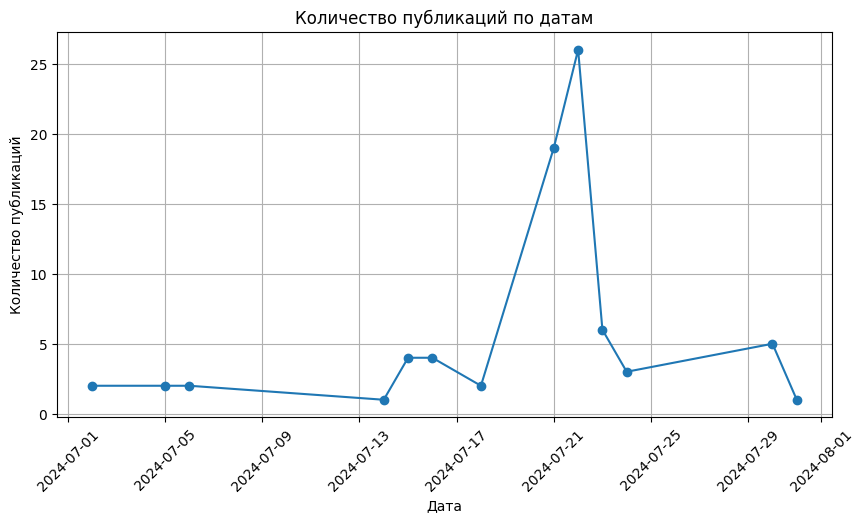

In [76]:
df_counts = df_negative.groupby('Release date').size()

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(df_counts.index, df_counts.values, marker='o', linestyle='-')

# Настройки графика
plt.xlabel('Дата')
plt.ylabel('Количество публикаций')
plt.title('Количество публикаций по датам')
plt.xticks(rotation=45)
plt.grid()

# Показать график
plt.show()

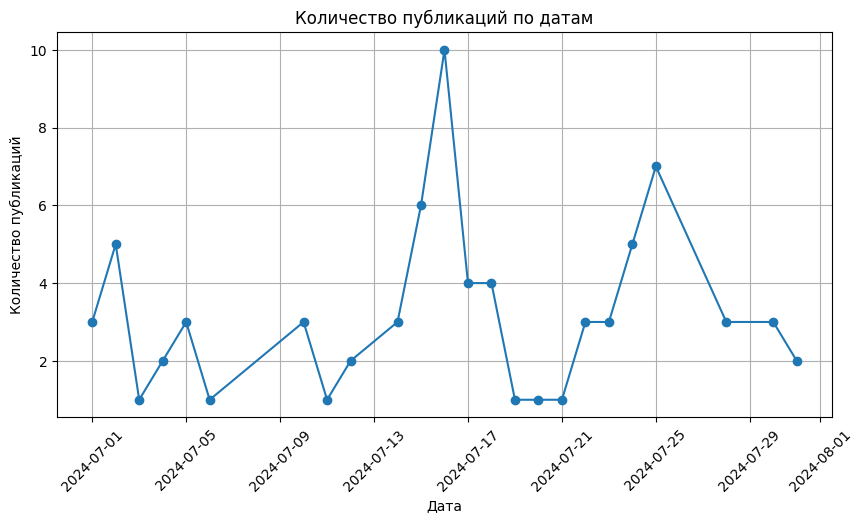

In [77]:
df_counts = df_neutral.groupby('Release date').size()

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(df_counts.index, df_counts.values, marker='o', linestyle='-')

# Настройки графика
plt.xlabel('Дата')
plt.ylabel('Количество публикаций')
plt.title('Количество публикаций по датам')
plt.xticks(rotation=45)
plt.grid()

# Показать график
plt.show()

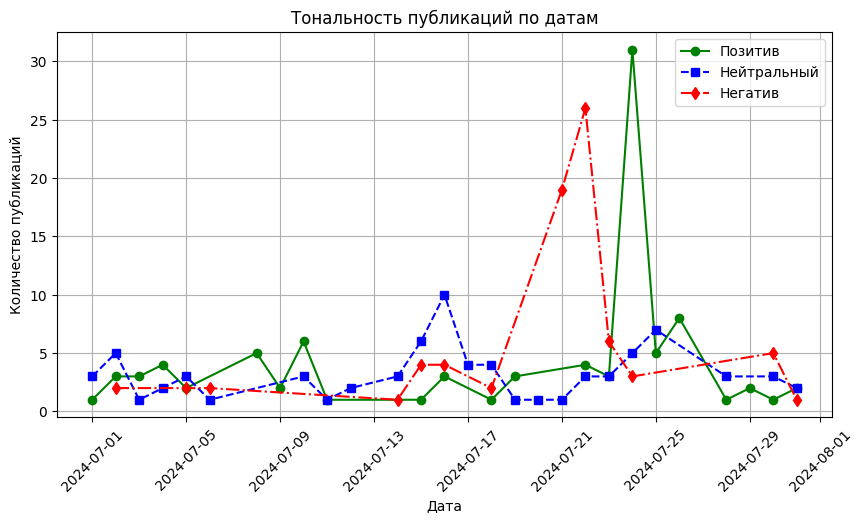

In [107]:
#df_positive = df[df['Tonality'] == 'Позитив']
#df_negative = df[df['Tonality'] == 'Негатив']
#df_neutral = df[df['Tonality'] == 'Нейтрал']

df1_counts = df_positive['Release date'].value_counts().sort_index()
df2_counts = df_neutral['Release date'].value_counts().sort_index()
df3_counts = df_negative['Release date'].value_counts().sort_index()


# Строим график
plt.figure(figsize=(10, 5))

plt.plot(df1_counts.index, df1_counts.values, marker='o', linestyle='-', color='green', label='Позитив')
plt.plot(df2_counts.index, df2_counts.values, marker='s', linestyle='--', color='blue', label='Нейтральный')
plt.plot(df3_counts.index, df3_counts.values, marker='d', linestyle='-.', color='red', label='Негатив')

# Оформление графика
plt.xlabel('Дата')
plt.ylabel('Количество публикаций')
plt.title('Тональность публикаций по датам')
plt.xticks(rotation=45)
plt.legend()  # Добавляем легенду
plt.grid()

plt.savefig('Кількість публікацій по даті у розрізі тональності.png', dpi=300, bbox_inches='tight')
# Показать график
plt.show()

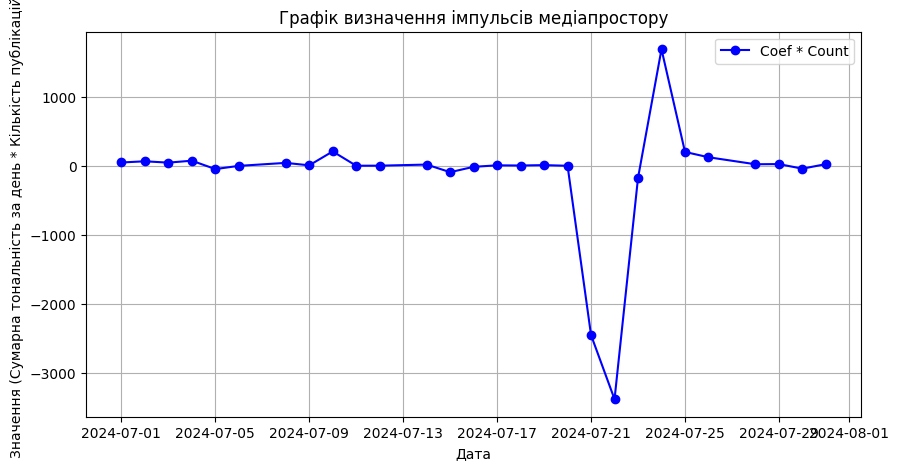

In [109]:
# Группируем по дате: считаем количество элементов и умножаем на коэффициент
df_grouped = df.groupby("Release date")["Media efficiency"].sum() * df.groupby("Release date")["Media efficiency"].count()
# Строим график
plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped.values, marker="o", linestyle="-", color="b", label="Coef * Count")

# Добавляем подписи
plt.xlabel("Дата")
plt.ylabel("Значення (Сумарна тональність за день * Кількість публікацій)")
plt.title("Графік визначення імпульсів медіапростору")
plt.legend()
plt.grid(True)

plt.savefig('Графік визначення імпульсів медіапростору.png', dpi=300, bbox_inches='tight')
# Показываем график
plt.show()

In [99]:
#start_date = "19.07.2025"
#end_date = "23.07.2025"

# Задаем диапазон дат
start_date = "19.07.2024"
end_date = "23.07.2024"

# Фильтруем DataFrame по диапазону
df_filtered_negative_trend = df[(df["Release date"] >= start_date) & (df["Release date"] <= end_date)]

# Задаем диапазон дат
start_date = "23.07.2024"
end_date = "25.07.2024"

# Фильтруем DataFrame по диапазону
df_filtered_positive_trend = df[(df["Release date"] >= start_date) & (df["Release date"] <= end_date)]


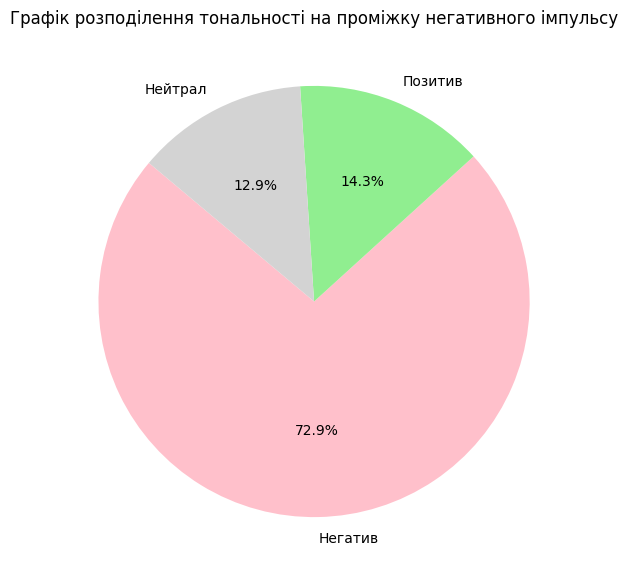

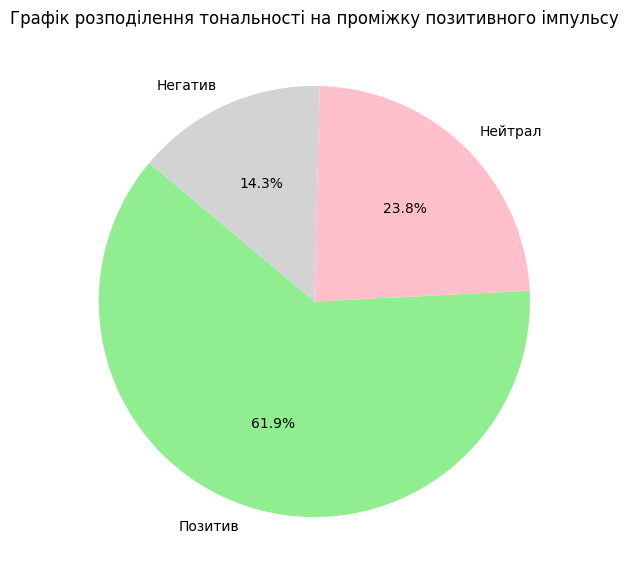

In [120]:
# Подсчитываем количество значений в каждом классе тональности
tonality_counts_n = df_filtered_negative_trend["Tonality"].value_counts()
tonality_counts_p = df_filtered_positive_trend["Tonality"].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(7, 7))
plt.pie(
    tonality_counts_n, labels=tonality_counts_n.index, autopct="%1.1f%%", startangle=140, colors=["pink", "lightgreen", "lightgray"]
)

# Добавляем заголовок
plt.title("Графік розподілення тональності на проміжку негативного імпульсу")
plt.savefig('Графік розподілення тональності на проміжку негативного імпульсу.png', dpi=300, bbox_inches='tight')
# Показываем график
plt.show()


# Строим круговую диаграмму
plt.figure(figsize=(7, 7))
plt.pie(
    tonality_counts_p, labels=tonality_counts_p.index, autopct="%1.1f%%", startangle=140, colors=["lightgreen", "pink", "lightgray"]
)

# Добавляем заголовок
plt.title("Графік розподілення тональності на проміжку позитивного імпульсу")

plt.savefig('Графік розподілення тональності на проміжку позитивного імпульсу.png', dpi=300, bbox_inches='tight')
# Показываем график
plt.show()

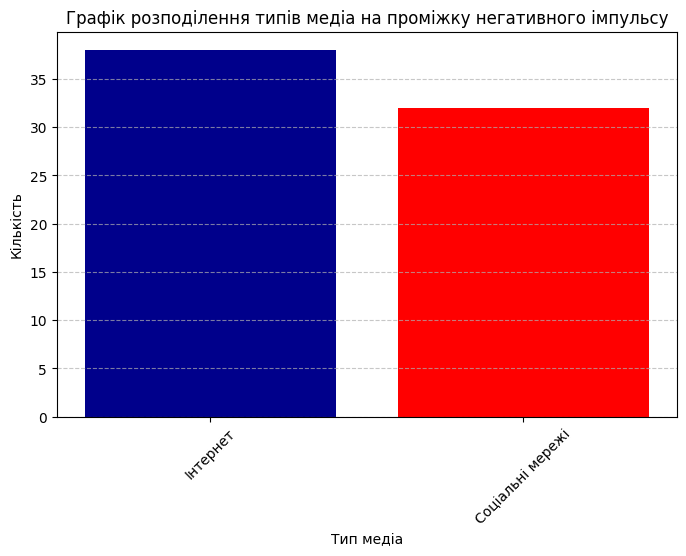

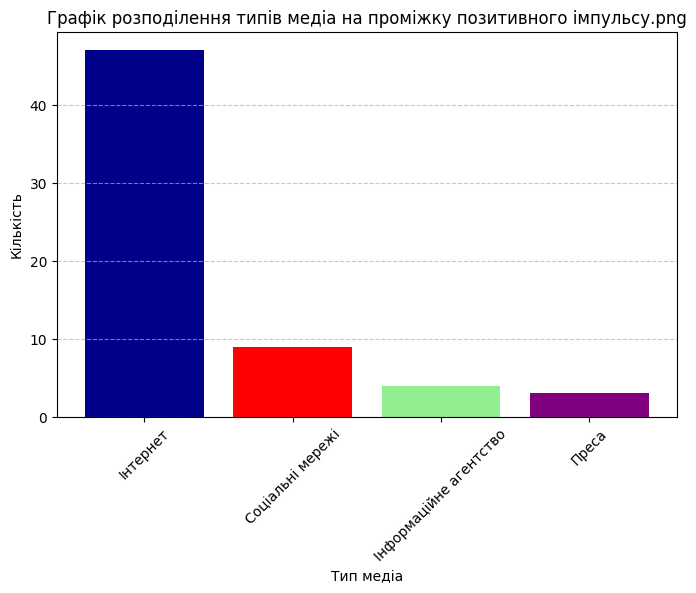

In [127]:
media_counts_n = df_filtered_negative_trend["Type of media"].value_counts()

media_counts_p = df_filtered_positive_trend["Type of media"].value_counts()

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 5))
plt.bar(media_counts_n.index, media_counts_n.values, color=["darkblue", "red", "green", "purple"])

# Добавляем подписи
plt.xlabel("Тип медіа")
plt.ylabel("Кількість")
plt.title("Графік розподілення типів медіа на проміжку негативного імпульсу")
plt.xticks(rotation=45)  # Поворачиваем подписи для читаемости
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig('Графік розподілення типів медіа на проміжку негативного імпульсу.png', dpi=300, bbox_inches='tight')
# Показываем график
plt.show()

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 5))
plt.bar(media_counts_p.index, media_counts_p.values, color=["darkblue", "red", "lightgreen", "purple"])

# Добавляем подписи
plt.xlabel("Тип медіа")
plt.ylabel("Кількість")
plt.title("Графік розподілення типів медіа на проміжку позитивного імпульсу.png")
plt.xticks(rotation=45)  # Поворачиваем подписи для читаемости
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig('Графік розподілення типів медіа на проміжку позитивного імпульсу.png', dpi=300, bbox_inches='tight')

# Показываем график
plt.show()